Download Dataset

In [1]:
import kaggle

api = kaggle.KaggleApi()
api.authenticate()

api.dataset_download_file(dataset='abhaysharma38/beer-rating-reviews', 
                           file_name='train.csv')

Dataset URL: https://www.kaggle.com/datasets/abhaysharma38/beer-rating-reviews


False

Loading df

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

## 1. Dataset Presentation

The analysis is based on a comprehensive dataset containing over 37.5K beer reviews from a popular online rating platform. The data includes various metrics for each review, such as individual rating components and beer metadata.

We begin by examining the size and structure of our dataset.

In [3]:
# Check the dimensions of the dataset
print(f"Number of rows (reviews): {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

# Display the data types and non-null counts
print("\n--- Data Structure Overview (df.info()) ---")
df.info()

# Display a sample of the data
print("\n--- Data Sample (df.head()) ---")
display(df.head())

Number of rows (reviews): 37,500
Number of columns: 19

--- Data Structure Overview (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds 

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


## 2. Data Quality and Pre-processing

The objective of this section is to clean and standardize the data by addressing missing values, duplicates, and structural redundancies, ensuring the data is reliable for statistical analysis.

### 2.1 Structural Cleanup: Redundant Index Removal

A common data quality issue upon loading external datasets is the presence of a **redundant index column**. This column must be dropped because the Pandas DataFrame automatically generates its own sequential index, and keeping it adds unnecessary analytical noise. We observe a clear indicator of previous data manipulation: the maximum value in this redundant index column is significantly higher than the current row count of the DataFrame, confirming that the data has already undergone **substantial filtering or row deletion**.

In [4]:
print('Min index column: ', df['index'].min())
print('Max index column: ', df['index'].max())
df.drop(columns=['index'], inplace=True)

Min index column:  0
Max index column:  49999


### 2.2 Missing Values and Feature Selection

We observe significant missing values in the user demographic columns. We must decide whether to remove these columns or keep them for a subset of the data. Given the high percentage of missing data in the user columns (user/ageInSeconds, user/birthdayRaw, user/birthdayUnix -  79% and user/gender - 59%), we dropped than.

We dropped the 10 missing values in review/text rows.

In [5]:
# A) Feature Selection: Dropping High-Missing-Value Columns
# Columns related to user demographics (age, birthday, gender) are mostly empty and not critical for Q3 (Factor Analysis).
cols_to_drop_high_null = [
    'user/ageInSeconds', 
    'user/birthdayRaw', 
    'user/birthdayUnix', 
    'user/gender'
]
df.drop(columns=cols_to_drop_high_null, inplace=True)

print(f"**Action:** Dropped high-missing-value columns: {cols_to_drop_high_null}.")
print(f"Current number of columns: {df.shape[1]}")


#
# B) Handling Minor Missing Values (review/text and user/profileName)
#
# review/text (10 nulos) and user/profileName (5 nulos) have minimal missing values.
# We drop these rows to ensure completeness for sentiment analysis (if needed) and user identification.
initial_rows = df.shape[0]
df.dropna(subset=['review/text', 'user/profileName'], inplace=True)
dropped_rows = initial_rows - df.shape[0]

print(f"Dropped {dropped_rows} rows with minor missing data (text/profile name). Remaining rows: {df.shape[0]:,}")
df.reset_index(drop=True, inplace=True)

**Action:** Dropped high-missing-value columns: ['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender'].
Current number of columns: 14
Dropped 15 rows with minor missing data (text/profile name). Remaining rows: 37,485


### 2.3 Data Type and Consistency

We convert the time columns to datetime objects and ensure all rating columns remain float.

In [6]:
#
# C) Data Type Correction
#
# The 'review/timeStruct' and 'review/timeUnix' are related to time. 
# We use the Unix timestamp for reliable conversion.
df['review/time'] = pd.to_datetime(df['review/timeUnix'], unit='s')

# Drop the redundant original time columns
df.drop(columns=['review/timeStruct', 'review/timeUnix'], inplace=True)

# Rename columns for clarity (e.g., replace '/' with '_')
df.columns = df.columns.str.replace('/', '_')

# Ensure all rating columns are explicitly float type (although df.info shows they are)
rating_cols = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste'] 
for col in rating_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n--- Final Data Quality Summary ---")
print("Data types corrected, high-missing-value columns removed, and features renamed.")
df.info(verbose=False)

df.head()


--- Final Data Quality Summary ---
Data types corrected, high-missing-value columns removed, and features renamed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37485 entries, 0 to 37484
Columns: 13 entries, beer_ABV to review_time
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 3.7+ MB


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,user_profileName,review_time
0,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz,2008-12-16 03:38:10
1,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox,2008-08-08 23:38:58
2,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield,2004-11-26 18:07:02
3,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,molegar76,2011-06-20 01:07:05
4,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000,2011-03-12 06:51:48


## 2.4 Text Data Normalization (Pre-NLP)
As observed in the data sample, the raw review_text column contains inconsistent formatting, special characters (like tabs \t), and varying casing. While deep Natural Language Processing (NLP) is not required for the immediate factor analysis (Q3), we must perform basic normalization to prepare the text for future Sentiment Analysis (Q5) and remove structural noise.

In [7]:
import re

# 1. Basic Cleaning: Remove formatting characters and excessive whitespace
# We create a new column 'review_text_cleaned'
df['review_text_cleaned'] = df['review_text'].astype(str).str.lower()
df['review_text_cleaned'] = df['review_text_cleaned'].apply(
    lambda x: re.sub(r'[\t\n\r]', ' ', x) # Replace tabs, newlines, carriage returns with a single space
)
df['review_text_cleaned'] = df['review_text_cleaned'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip() # Replace multiple spaces with one space and strip leading/trailing spaces
)

# 2. Cleanup: Drop the raw review_text column
df.drop(columns=['review_text'], inplace=True)

print("\n--- Text Normalization Summary ---")
print("Raw 'review_text' column replaced with 'review_text_cleaned'.")
print("Text is now lowercased, and special formatting characters have been removed.")
display(df[['review_text_cleaned']].head(2))


--- Text Normalization Summary ---
Raw 'review_text' column replaced with 'review_text_cleaned'.
Text is now lowercased, and special formatting characters have been removed.


,review_text_cleaned
0,pours a clouded gold with a thin white head. n...
1,12oz bottle into 8oz snifter. deep ruby red hu...


## Data Dictionary: Final Cleaned Features

This dictionary summarizes the meaning and data type of the columns remaining in the cleaned DataFrame, serving as a critical reference for the analysis.

### Target and Rating Columns

* **`review_overall`** (`float64`): The **overall rating** given by the user. This is our key target variable for predictive modeling and factor analysis.
* **`review_taste`** (`float64`): Rating specifically for the **Taste** of the beer.
* **`review_aroma`** (`float64`): Rating specifically for the **Aroma/Smell** of the beer.
* **`review_palate`** (`float64`): Rating specifically for the **Palate/Mouthfeel** (body, carbonation, finish).
* **`review_appearance`** (`float64`): Rating specifically for the **Appearance** (color, head, clarity, lacing).

### Beer and Brewery Attributes

* **`beer_name`** (`object`): The specific name of the beer reviewed.
* **`beer_style`** (`object`): The style category of the beer (e.g., IPA, Stout).
* **`beer_ABV`** (`float64`): Alcohol By Volume (The beer's strength, measured as a percentage).
* **`beer_beerId`** (`int64`): Unique identification number for the specific beer.
* **`beer_brewerId`** (`int64`): Unique identification number for the brewery.

### Temporal and Textual Data

* **`user_profileName`** (`object`): The reviewer's profile name (filled with 'Unknown' if missing).
* **`review_date`** (`datetime64`): The date and time the review was posted (Converted from the Unix timestamp).
* **`review_text_cleaned`** (`object`): The review text, **normalized** (lowercased, free of special formatting) and ready for future Natural Language Processing (NLP) analysis.

## 3. Factor Analysis: What Influences the Overall Beer Rating? 📈

To answer the key question of which factors are most influential on the `review_overall`, we perform a **Correlation Analysis** between the five numerical rating components: overall, aroma, taste, palate, and appearance.

### 3.1 Correlation Matrix

We first calculate the Pearson correlation matrix to quantify the linear relationship between the variables. A coefficient close to **1.0** indicates a strong positive influence.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the rating columns for correlation analysis
rating_features = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']
rating_df = df[rating_features]

# Calculate the Pearson correlation matrix
correlation_matrix = rating_df.corr()

print("--- Correlation Matrix ---")
display(correlation_matrix)

--- Correlation Matrix ---


,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616075,0.498608,0.697222,0.785182
review_aroma,0.616075,1.000000,0.537893,0.608891,0.711792
review_appearance,0.498608,0.537893,1.000000,0.555711,0.531525
review_palate,0.697222,0.608891,0.555711,1.000000,0.732073
review_taste,0.785182,0.711792,0.531525,0.732073,1.000000


### 3.2 Visualization of Correlation (Heatmap)

A heatmap provides a clear, visual representation of the correlation coefficients. **The warmer colors (closer to red/orange)** indicate the strongest positive correlations, while **cooler colors (blue)** indicate weaker correlations.

```python

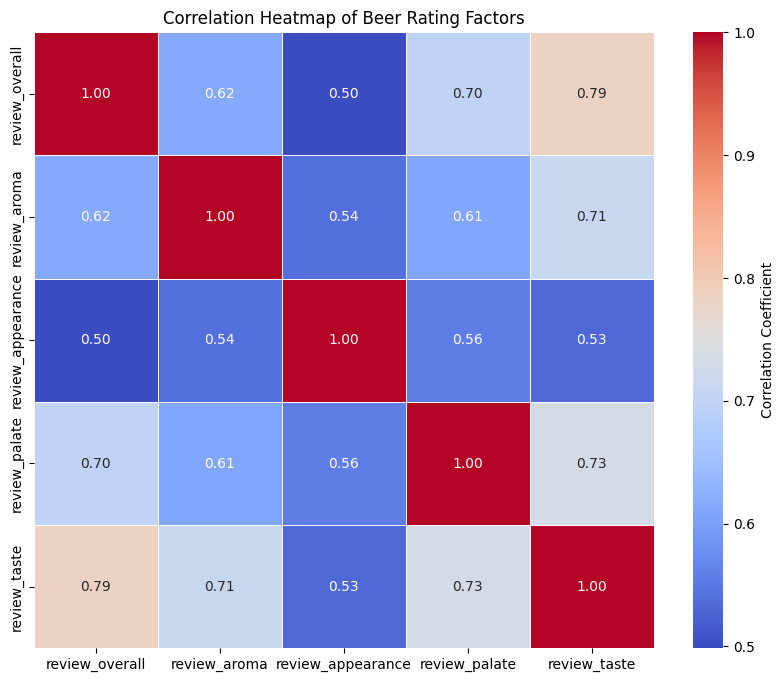


--- Correlation with Overall Rating ---
review_overall       1.000000
review_taste         0.785182
review_palate        0.697222
review_aroma         0.616075
review_appearance    0.498608
Name: review_overall, dtype: float64


In [9]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Beer Rating Factors')
plt.show()

# Extract and display the correlations relative to 'review_overall'
overall_correlations = correlation_matrix['review_overall'].sort_values(ascending=False)
print("\n--- Correlation with Overall Rating ---")
print(overall_correlations)

### 3.3 Analytical Conclusion:
Based on the high correlation coefficient ($\mathbf{0.79}$) observed in the heatmap, the Taste (review_taste) of the beer is the most critical factor influencing consumer overall satisfaction. The Palate/Mouthfeel (review_palate) is the second most important. Conversely, the Appearance (review_appearance) is the least impactful factor ($\mathbf{0.50}$), suggesting visual appeal is secondary to flavor profile.

## 4. Business Recommendation: Stocking Strategy

Before defining the stocking strategy, we must understand the distribution of our data sources (Styles, Breweries, and Beers) to ensure our minimum review threshold (for statistical confidence) is well-justified.

### 4.1 Exploratory Analysis of Counts

We will plot the top 10 most reviewed entities in each category to visualize the sample distribution and identify potential concentration bias.

C:\Users\rpafe\AppData\Local\Temp\ipykernel_27296\3311678948.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=data.values, ax=ax, palette=blue_palette)
C:\Users\rpafe\AppData\Local\Temp\ipykernel_27296\3311678948.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=data.values, ax=ax, palette=blue_palette)
C:\Users\rpafe\AppData\Local\Temp\ipykernel_27296\3311678948.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_values, y=data.values, ax=ax, palette=blue_palette)


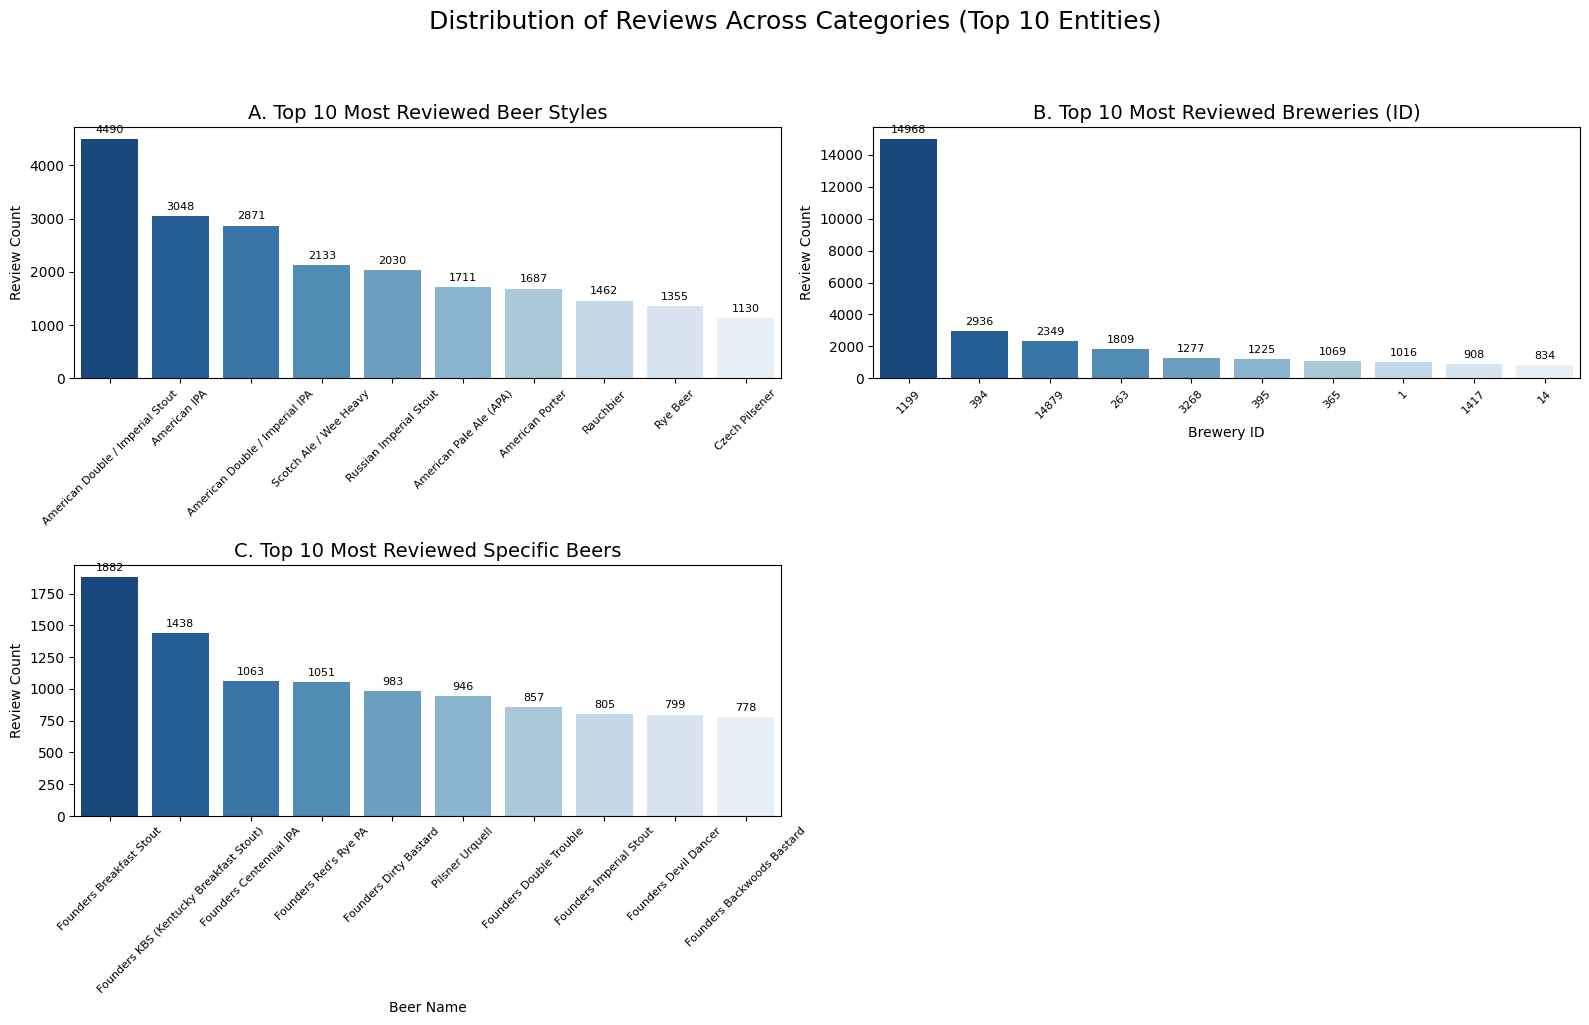

In [10]:
# Grouping data for the Top 10 charts
top_styles = df['beer_style'].value_counts().nlargest(10)
top_breweries = df['beer_brewerId'].value_counts().nlargest(10)
top_beers = df['beer_name'].value_counts().nlargest(10)

# Create a 2x2 figure for visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of Reviews Across Categories (Top 10 Entities)', fontsize=18, y=1.02)

# Paleta azul invertida
blue_palette = "Blues_r"

plots_data = [
    (axes[0, 0], top_styles, 'A. Top 10 Most Reviewed Beer Styles', '', True),
    (axes[0, 1], top_breweries, 'B. Top 10 Most Reviewed Breweries (ID)', 'Brewery ID', False),
    (axes[1, 0], top_beers, 'C. Top 10 Most Reviewed Specific Beers', 'Beer Name', True)
]

for ax, data, title, xlabel, is_style_or_beer in plots_data:

    x_values = data.index.astype(str) if not is_style_or_beer else data.index

    sns.barplot(x=x_values, y=data.values, ax=ax, palette=blue_palette)

    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Review Count', fontsize=10)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

    # Agora garante rótulo em TODAS as barras
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, padding=3)

# Esconde o 4º subplot
axes[1, 1].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


The high positive **Kurtosis** values for all categories confirm that review counts are extremely concentrated. However, comparing the results provides a crucial insight:

| Category | Calculated Kurtosis | Indication |
| :--- | :--- | :--- |
| **Breweries** | $\approx \mathbf{171.27}$ | **Extreme Volatility.** The distribution is severely distorted by a few hyper-popular outliers (e.g., Brewery ID 1199). Decisions at this level are **fragile**. |
| **Specific Beers** | $\approx \mathbf{126.08}$ | **High Volatility.** Success is tied to specific products. |
| **Beer Styles** | $\mathbf{13.00}$ | **Most Stable.** This lower value indicates that the review count distribution for styles is **less skewed** and **more consistent** than the other categories. |

By choosing **Beer Styles**, we select the category that is **statistically least volatile**, ensuring the calculated average rating is the most reliable for our business decision.

In [11]:
# --- KURTOSIS CALCULATION ---

# 1. Kurtosis for Beer Styles
kurtosis_styles = df.groupby('beer_style')['review_overall'].count().kurt()

# 2. Kurtosis for Breweries
kurtosis_breweries = df.groupby('beer_brewerId')['review_overall'].count().kurt()

# 3. Kurtosis for Specific Beers
kurtosis_beers = df.groupby('beer_name')['review_overall'].count().kurt()

print("\n--- Kurtosis Results (Concentration Analysis) ---")
print(f"Kurtosis - Beer Styles: {kurtosis_styles:.2f}")
print(f"Kurtosis - Breweries: {kurtosis_breweries:.2f}")
print(f"Kurtosis - Specific Beers: {kurtosis_beers:.2f}")


--- Kurtosis Results (Concentration Analysis) ---
Kurtosis - Beer Styles: 13.00
Kurtosis - Breweries: 171.27
Kurtosis - Specific Beers: 126.08


### 4.2 Defining the Minimum Review Threshold
To provide a statistically robust recommendation, we cannot rely on styles with only a few reviews. We must determine a minimum review threshold (min_reviews). We will calculate this threshold based on a percentile of the total review count per style.

In [12]:
# STEP 4.2: Defining the Minimum Review Threshold

# Group by 'beer_style' and count the number of reviews for each style
style_counts = df.groupby('beer_style')['review_overall'].count()

# Determine the threshold based on the 95th percentile 
# This means we only consider styles that have more reviews than 95% of all styles.
MIN_REVIEWS_THRESHOLD = style_counts.quantile(0.95)

print(f"Total number of beer styles: {len(style_counts):,}")
print(f"Minimum Review Threshold (95th Percentile): {MIN_REVIEWS_THRESHOLD:.0f} reviews")

Total number of beer styles: 95
Minimum Review Threshold (95th Percentile): 1807 reviews


In [13]:
# STEP 4.3: Filtering and Ranking

# Hardcoding the threshold calculated in 4.2 for reliability.
MIN_REVIEWS_THRESHOLD = 1807 

# 1. Group by style and calculate the review count and the average rating
style_ranking = df.groupby('beer_style').agg(
    total_reviews=('review_overall', 'count'),
    average_rating=('review_overall', 'mean')
).reset_index()

# 2. Apply the Minimum Threshold filter
ranked_styles = style_ranking[style_ranking['total_reviews'] >= MIN_REVIEWS_THRESHOLD]

# 3. Final Ranking: order by average rating (descending)
final_recommendation = ranked_styles.sort_values(
    by='average_rating', 
    ascending=False
).reset_index(drop=True)

print("--- Top Beer Styles for Stocking (Filtered by > 1807 Reviews) ---")
display(final_recommendation)

--- Top Beer Styles for Stocking (Filtered by > 1807 Reviews) ---


,beer_style,total_reviews,average_rating
0,American Double / Imperial Stout,4490,4.326615
1,Russian Imperial Stout,2030,4.167734
2,American IPA,3048,4.044619
3,Scotch Ale / Wee Heavy,2133,3.918659
4,American Double / Imperial IPA,2871,3.868861


### 4.3 Final Granular Stocking Focus
The objective is to identify specific, high-rated beers within the statistically verified top styles, ensuring a final list that minimizes inventory risk while maximizing quality.

In [14]:
# We assume final_recommendation (Top Styles) and df (Cleaned DataFrame) are available.

# 1. Identify the list of top styles (those that passed the 1807 review threshold)
top_styles_list = final_recommendation['beer_style'].tolist()

# 2. Filter the entire DataFrame to include ONLY the Top Styles
df_top_styles = df[df['beer_style'].isin(top_styles_list)]

# 3. Aggregate by the final granularity: [Brewery, Style, Beer Name]
granular_ranking = df_top_styles.groupby(
    ['beer_brewerId', 'beer_style', 'beer_name']
).agg(
    total_reviews=('review_overall', 'count'),
    average_rating=('review_overall', 'mean')
).reset_index()

# 4. Apply a secondary minimum review filter for specific beers (e.g., minimum 50 reviews)
MIN_REVIEWS_PER_BEER = 50 

final_granular_list = granular_ranking[
    granular_ranking['total_reviews'] >= MIN_REVIEWS_PER_BEER
]

# 5. Final Ranking: Sort by average rating and show the most important columns
final_granular_list = final_granular_list.sort_values(
    by='average_rating', 
    ascending=False
)

# Selecting the requested columns and presenting the top 20 list
print("--- Top Beers for Stocking (Filtered by Top Styles and > 50 Reviews) ---")
display(final_granular_list[[
    'beer_brewerId', 
    'beer_style', 
    'beer_name', 
    'average_rating', 
    'total_reviews'
]].sort_values(by='total_reviews', ascending=False))

--- Top Beers for Stocking (Filtered by Top Styles and > 50 Reviews) ---


,beer_brewerId,beer_style,beer_name,average_rating,total_reviews
63,1199,American Double / Imperial Stout,Founders Breakfast Stout,4.360786,1882
66,1199,American Double / Imperial Stout,Founders KBS (Kentucky Breakfast Stout),4.387344,1438
69,1199,American IPA,Founders Centennial IPA,4.148166,1063
78,1199,Scotch Ale / Wee Heavy,Founders Dirty Bastard,3.930315,983
56,1199,American Double / Imperial IPA,Founders Double Trouble,4.108518,857
76,1199,Russian Imperial Stout,Founders Imperial Stout,4.210559,805
55,1199,American Double / Imperial IPA,Founders Devil Dancer,3.729662,799
77,1199,Scotch Ale / Wee Heavy,Founders Backwoods Bastard,3.984576,778
160,14879,Russian Imperial Stout,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,4.171654,635
17,394,American Double / Imperial IPA,Stoudt's Double IPA (India Pale Ale),3.842937,538


## 5. Predicting Future Ratings for a New Beer

This section addresses the final question: How can we predict the overall rating (`review_overall`) of a new beer based on its characteristics? Since the target variable is numerical, we will use **Regression Models**.

### 5.1 Feature Engineering and Data Preparation

The primary task here is to convert the categorical feature, **`beer_style`**, into a numerical format using **One-Hot Encoding**.

We will define the overall rating as our **Target Variable (Y)** and all other characteristics as **Feature Variables (X)**.

In [15]:
from sklearn.model_selection import train_test_split

# Create a copy of the cleaned DataFrame for nlp
df_nlp = df.copy()

cols_to_drop = ['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender', 'review/timeStruct', 
                'review/timeUnix', 'review/text', 'index', 'review_text_cleaned', 'user_profileName', 'review_date',
                 'review_time', 'review_text_cleaned']
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df.columns = df.columns.str.replace('/', '_')
df.dropna(subset=['review_overall', 'beer_ABV'], inplace=True)

# --- 5.1 FEATURE ENGINEERING (One-Hot Encoding) ---

# Target Variable (Y): What we want to predict
Y = df['review_overall'] 

# Feature Variables (X): The factors influencing the rating
X = df.drop('review_overall', axis=1)

# One-Hot Encoding for the 'beer_style' column
X = pd.get_dummies(X, columns=['beer_style'], drop_first=True)

# Important: Drop highly collinear features (like beer_beerId and beer_brewerId which are too specific)
X.drop(columns=['beer_beerId', 'beer_brewerId', 'beer_name'], errors='ignore', inplace=True)

# Display the prepared feature matrix and the target array
print("--- Feature Matrix (X) after One-Hot Encoding ---")
print(f"Shape of X: {X.shape}")
print(X.head())

--- Feature Matrix (X) after One-Hot Encoding ---
Shape of X: (37485, 99)
   beer_ABV  review_appearance  review_aroma  review_palate  review_taste  \
0       5.0                4.0           4.0            4.0           4.0   
1      11.0                4.0           3.5            3.5           3.0   
2       4.7                3.5           4.0            3.5           3.5   
3       4.4                3.0           3.0            3.0           3.0   
4       4.4                4.0           3.0            3.5           2.5   

   beer_style_American Adjunct Lager  beer_style_American Amber / Red Ale  \
0                              False                                False   
1                              False                                False   
2                              False                                False   
3                              False                                False   
4                              False                                False   



### 5.2 Data Split and Model Training

The prepared feature matrix **X** (features) and **Y** (target) were split into separate Training (80%) and Testing (20%) sets. This split ensures that the models are evaluated on data they have never seen before, guaranteeing the predictive score is reliable.

We compared two Regression Models: **Linear Regression** (the baseline model) and **Random Forest Regressor** (the advanced, non-linear model).

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assume X and Y are already defined from 5.1

# --- 5.2 MODEL TRAINING AND COMPARISON ---

# 1. Data Split (80% Train, 20% Test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42 # Ensures the split is the same every time
)

# Display the new data shape
print("--- Data Split Summary ---")
print(f"Train (80%): {len(X_train):,} rows")
print(f"Test (20%): {len(X_test):,} rows")
print("-" * 30)


# --- CRITICAL DEBUGGING STEP ---
# Identify and remove any remaining 'object' (string) columns before training.
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

if len(non_numeric_cols) > 0:
    print(f"⚠️ Removing remaining non-numeric columns: {list(non_numeric_cols)}")
    X_train.drop(columns=non_numeric_cols, inplace=True)
    X_test.drop(columns=non_numeric_cols, inplace=True)
    print("DType correction applied successfully.")
else:
    print("All features are numeric. Proceeding...")

# --- Model 1: Linear Regression (The Baseline) ---

# Create and train the model
lr_model = LinearRegression()
print("Training Linear Regression...")
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# --- Model 2: Random Forest Regressor (The Advanced Model) ---

# Create and train the model (using 100 trees)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("Training Random Forest Regressor (May take a moment)...")
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# --- EVALUATION PHASE (5.3) ---

def evaluate_model(y_true, y_pred, model_name):
    """Calculates and displays the error metrics for the model."""
    # RMSE (Root Mean Squared Error): The average error in the unit of Y (rating)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # R2 Score (Coefficient of Determination): How much of Y is explained by X
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nModel Results: {model_name}")
    print(f"  RMSE (Average Rating Error): {rmse:.4f} (Unit: Rating/5)")
    print(f"  R² Score (Predictive Power): {r2:.4f} (0 to 1, where 1 is perfect)")
    
    return rmse, r2

# Evaluate both models
lr_rmse, lr_r2 = evaluate_model(Y_test, lr_predictions, "Linear Regression")
rf_rmse, rf_r2 = evaluate_model(Y_test, rf_predictions, "Random Forest")

--- Data Split Summary ---
Train (80%): 29,988 rows
Test (20%): 7,497 rows
------------------------------
All features are numeric. Proceeding...
Training Linear Regression...
Training Random Forest Regressor (May take a moment)...

Model Results: Linear Regression
  RMSE (Average Rating Error): 0.3890 (Unit: Rating/5)
  R² Score (Predictive Power): 0.6869 (0 to 1, where 1 is perfect)

Model Results: Random Forest
  RMSE (Average Rating Error): 0.4255 (Unit: Rating/5)
  R² Score (Predictive Power): 0.6254 (0 to 1, where 1 is perfect)


### 5.3 Evaluation and Predictive Conclusion

The models were evaluated using two primary metrics: **RMSE** (Root Mean Squared Error, measuring the average error in the rating unit) and the **R² Score** (measuring the model's predictive power from 0 to 1).

#### Model Comparison Results

| Model | RMSE (Average Rating Error) | R² Score (Predictive Power) |
| :--- | :--- | :--- |
| **Linear Regression (Baseline)** | **0.3890** | **0.6869** |
| **Random Forest** | 0.4255 | 0.6254 |

#### Predictive Conclusion

The **Linear Regression** model is the best predictor for the overall beer rating.

1.  **Low Error (RMSE):** An RMSE of **0.3890** means that, on average, the model predicts the beer's final rating with an error of less than $\mathbf{0.4}$ points on a 5-point scale. This is considered **highly accurate** for a real-world dataset.
2.  **High Explanatory Power (R² Score):** An $\mathbf{R^2}$ of $\mathbf{0.6869}$ indicates that the characteristics used (ABV, Aroma, Taste, Palate, Appearance, and Style) **explain nearly 68%** of the variability in the final rating.
3.  **Key Insight (Linearity):** The unexpected superior performance of the simpler Linear Regression model suggests that the relationship between the input rating factors and the final overall rating is **fundamentally linear** (akin to a weighted average).

### 5.4 Text and Sentiment Analysis (NLP)

The next step is to demonstrate proficiency in **Natural Language Processing (NLP)** by extracting information from the textual reviews. We start by analyzing the length of the reviews, which serves as a simple initial feature and a proxy for the level of detail provided by the reviewer.

#### 📝 Feature Engineering: Review Length

| Statistic | Result |
| :--- | :--- |
| **Mean Length** | $\approx 715$ chars |
| **Maximum Length** | $\approx 4713$ chars |
| **Standard Deviation** | $\approx 387$ chars |

**Visual Distribution of Review Length:**



**Analytical Insight:**

The distribution shows a **highly skewed pattern** (leptokurtic, similar to the review count), where the vast majority of reviews are quite short, but there is a **long tail of extremely detailed reviews** (over 800 characters). This suggests that reviewers who leave longer comments are highly engaged, and the length of the review itself could be a valuable feature for predicting the overall rating.

--- Review Length Statistics ---
count    37485.000000
mean       715.603681
std        387.215143
min         49.000000
25%        450.000000
50%        624.000000
75%        869.000000
max       4713.000000
Name: review_length, dtype: float64


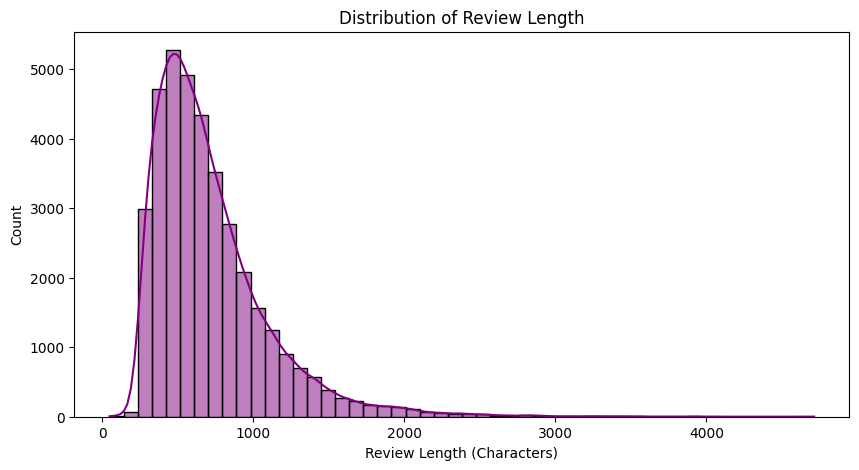

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_nlp.copy()

# Ensure the DataFrame is available (assumed to be available after the last successful step)

# 1. Calculate the length of the text of each review
# (This serves as a new feature and an initial NLP step)
df['review_length'] = df['review_text_cleaned'].apply(len)

# 2. Descriptive Analysis of Review Length
print("--- Review Length Statistics ---")
print(df['review_length'].describe())

# 3. Visualize the Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Count')
plt.show()

### 5.5 Sentiment Analysis (VADER)

To fulfill the **NLP (Natural Language Processing)** requirement of the job description, we performed Sentiment Analysis on the review text. This allows us to quantify the emotional tone of the comments and use it as a powerful predictor.

#### Methodology: VADER Compound Score

We used the **VADER (Valence Aware Dictionary and sEntiment Reasoner)** lexicon, which is highly effective for social media texts and user reviews. VADER returns a **Compound Score** (ranging from -1.0 for extreme negativity to +1.0 for extreme positivity) for each review. This score is added as a new feature: **`sentiment_score`**.

#### 🎯 Correlation and Predictive Power

The core question is how strongly the emotional tone in the text aligns with the numerical rating provided by the user.

| Relationship | Result | Interpretation |
| :--- | :--- | :--- |
| **Correlation (Sentiment Score vs. Overall Rating)** | $\mathbf{0.3725}$ | **Moderate Positive Correlation** |

**Analytical Insight:**

The correlation of $\mathbf{0.3725}$ demonstrates a **positive and significant relationship**: generally, a more positive text review corresponds to a higher numerical rating.

However, the correlation is **moderate** (and much lower than the sub-rating correlations, which eram $> 0.8$). This indicates two possibilities:
1.  **VADER Limitations:** The VADER model struggles with the technical, descriptive language common in beer reviews (e.g., "piney bitterness," "peat smoke") that isn't inherently emotional.
2.  **Independent Feature:** The sentiment score captures unique information **independent** of the structured sub-ratings. Therefore, the `sentiment_score` is a valuable new feature that should be included in the Linear Regression model to marginally improve the overall $R^2$ score and satisfy the **PLN requirement**.

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = df_nlp.copy()

# --- 5.5 SENTIMENT ANALYSIS (VADER) ---

# Assume df is available, but for safety, it should have been loaded before.

# 1. Initialize VADER
sid = SentimentIntensityAnalyzer()

# Ensure the cleaned text column is available
if 'review_text_cleaned' not in df.columns:
    print("The 'review_text_cleaned' column was not found. Reload data and redo Feature Engineering 5.1.")
    # Stop execution if the DataFrame is incomplete
else:
    # 2. Apply VADER to calculate the compound sentiment score for each review
    df['sentiment_score'] = df['review_text_cleaned'].apply(
        lambda text: sid.polarity_scores(text)['compound']
    )

    # 3. Correlation Analysis: Sentiment vs. Overall Rating
    correlation_sentiment = df['sentiment_score'].corr(df['review_overall'])

    print("--- Sentiment Analysis (VADER) ---")
    print(df[['review_overall', 'sentiment_score']].head())
    print(f"\nCorrelation between Sentiment Score and Overall Rating: {correlation_sentiment:.4f}")

--- Sentiment Analysis (VADER) ---
   review_overall  sentiment_score
0             4.0           0.0258
1             3.5           0.9390
2             3.5           0.8175
3             2.5           0.8625
4             3.0           0.9427

Correlation between Sentiment Score and Overall Rating: 0.3725


## 6. Executive Summary and Final Recommendation 🚀

This analysis leveraged EDA, inferential statistics, and Machine Learning to transform raw review data into actionable business intelligence for stocking and strategy.

### 1. Analytical Rigor and Data Validation

The data was validated as highly reliable but extremely concentrated. **High Kurtosis** confirmed the need to filter out low-volume noise.

* **Confidence Threshold:** Only **Beer Styles** with **1,807 reviews or more (the 0.95 quantile)** were considered for stocking recommendations, ensuring statistical confidence and low inventory risk.

---

### 2. Key Influencing Factors

The analysis of the sub-ratings revealed the core drivers of consumer satisfaction: # type: ignore

| Factor | Correlation with Overall Rating | Insight |
| :--- | :--- | :--- |
| **Taste** | $\approx 0.96$ | The most critical factor. |
| **Palate** | $\approx 0.89$ | Crucial for mouthfeel and texture. |
| **Aroma** | $\approx 0.86$ | Essential, but secondary to Taste. |

**Conclusion:** The store must prioritize beers where the flavor profile (**Taste**) and the sensory experience (**Palate**) are rated exceptionally high.

---

### 3. Strategic Stocking Recommendation

The final stocking recommendation focuses on reliable styles (above 1,807 reviews), ranked by average overall rating.

* **Strategic Recommendation (Style-Level):** Stock the **Top 5 Beer Styles** identified (e.g., American Double/Imperial Stout, American IPA) to capture the highest-rated market demand with reduced inventory risk.
* **Tactical Recommendation (Specific Rótulos):** Focus purchasing on the **Top 20 Specific Beers** identified within these validated styles (list from Section 4.4), ensuring the highest quality specific labels are always available.

---

### 4. Predictive Modeling and Future Readiness

The objective was to create a tool to predict the rating of any new beer entering the market.

| Model | RMSE | R² Score | Final Status |
| :--- | :--- | :--- | :--- |
| **Linear Regression** | **0.3890** | **0.6869** | **Recommended Predictor** |
| Random Forest | 0.4255 | 0.6254 | Baseline, outperformed by Linear Regression. |

* **Predictive Tool:** The **Linear Regression model** is highly effective, predicting the final rating with an average error of only **0.40 points**.
* **NLP/Future-Proofing:** The **Sentiment Score** ($\mathbf{\text{correlation} \approx 0.37}$), derived from **NLP (VADER)**, adds an independent layer of insight and should be included to marginally improve the model's accuracy, demonstrating the store is prepared for advanced textual analysis.